# Chapter 7. 통계학과 머신러닝

## 7.2 정규화와 리지 회귀, 라소 회귀

* 통계학과 머신러닝을 이어주는 모델인 리지 회귀와 라소 회귀를 소개함

* 단순한 예측모델로도 뛰어나고, 다양한 머신러닝에 이용되는 정규화라는 이론을 이해하기 위한 내용으로도 뛰어남

### 7.2.1 정규화 

* **정규화** : 파라미터를 추정할 때 손실함수에 벌칙항을 도입함으로써 계수가 큰 값이 되는 것을 막는 기법. 벌칙항은 정규화항이라고도 부르며 통계학에서는 **파라미터의 축소 추정**이라고도 부름

### 7.2.2 리지 회귀

* **리지 회귀** : 정규화항으로 계수의 제곱합을 이용한 회귀모델. 이 타입의 정규화를 **L2 정규화** 라고도 부름

* **수식 비교**

    - 보통의 최소제곱법: **잔차제곱합을 최소로 하는 계수 추정**
    
    $$\sum_{i=1}^{I} \left( y_i - \sum_{j=1}^{J}\beta_j \cdot x_{ij} \right)$$
    
    - **리지회귀**는 아래처럼 **벌칙이 있는 잔차제곱합**을 **최소로 하는 계수를 추정**
    
    $$\sum_{i=1}^{I} \left[ \left( y_i - \sum_{j=1}^{J}\beta_j \cdot x_{ij} \right)^2 + \alpha \sum_{j=1}^{J}\beta_{j}^{2} \right]$$

* **$\alpha \sum_{j=1}^{J} \beta_{j}^{2}$** : 정규화항(벌칙항)

* **$\alpha$** : 정규화의 강도를 지정하는 파라미터, $\alpha$가 크면 벌칙의 영향이 강해지기 때문에 계수의 절대치는 작아짐

### 7.2.3 라소 회귀

* **라소 회귀** : 정규화항으로 계수의 절댓값의 합을 이용한 회귀모델. 이 타입의 정규화를 **L1 정규화**라고도 부름

* 라소 회귀는 아래와 같이 벌칙이 있는 잔차제곱합을 최소로 하는 계수를 추정함

    - 벌칙항이 **절댓값의 합이 된 점**을 제외하면 리지 회귀와 같음
    
    $$\sum_{i=1}^{I} \left[ \left( y_i - \sum_{j=1}^{J}\beta_j \cdot x_{ij} \right)^2 + \alpha \sum_{j=1}^{J} \left| \beta_{j} \right| \right]$$

### 7.2.4 정규화 강도를 지정하는 파라미터의 결정

* $\alpha$를 여러가지로 변화시킨 후 교차검증법을 이용해서 테스트 데이터에 대한 예측 정확도를 평가함. 그 중 테스트 데이터를 가장 잘 예측한 $\alpha$를 선택함

    * 교차검증법 사용을 권장함

### 7.2.5 독립변수의 표준화

* 리지나 라소를 실행하기 전에 미리 독립변수를 평균 0, 표준편차 1로 표준화할 필요가 있음

     * 예를 들어 kg 단위의 데이터를 사용했을 때와, g 단위의 데이터를 사용했을 때의 회귀계수의 절댓값의 크기가 바뀜 
     
     * 회귀계수의 절댓값이 커지면 벌칙의 영향도 커짐 -> 독립변수의 단위가 파라미터 추정 시 영향을 주는 것을 막기 위해 미리 독립변수를 표준화함

### 7.2.6 리지 회귀와 라소 회귀의 추정 결과 차이

* 리지 회귀는 전체적으로 절대치가 작은 회귀계수를 얻을 수 있음

* 라소 회귀는 대부분의 파라미터가 0이 되고, 일부 파라미터만 0과 다른 값이 되기 쉬움 -> 변수 선택에 사용

    - **라소 회귀**는 성긴(sparse) 해를 얻을 수 있기 때문에 **스파스 모델링**이라는 이름으로 소개되기도 함
    
    > (참고) https://towardsdatascience.com/from-linear-regression-to-ridge-regression-the-lasso-and-the-elastic-net-4eaecaf5f7e6

![image.png](drawings/Lasso_Ridge.png)

### 7.2.7 변수 선택과 정규화의 비교

* 변수 선택에서는 AIC 기준 등에 근거하여 불필요한 독립변수를 모델에서 제외함

* 정규화를 이용하여 절대치가 큰 계수를 추정하는 것을 피하고 독립변수가 종속변수에 미치는 영향을 줄일 수 있음

    - 라소 회귀에서 계수가 0이 되는 변수를 제외하고 변수를 선택하는 방식으로 변수 선택에 활용할 수 있음

### 7.2.8 정규화의 의의

* **(AIC 등을 이용한 변수 선택의 결점 보완)** 모든 변수 조합에 대한 AIC의 계산 수행 시 계산량이 많아지는 단점이 있음. 리지 회귀나 라소 회귀를 사용하면 적은 계산 비용으로 다양한 독립변수를 사용할 모델을 적절한 복잡도로 추정할 수 있음

* **(적은 샘플 사이즈 데이터에도 적용 가능)** 샘플 사이즈보다 독립변수의 종류가 많은 데이터에도 라소 회귀 등을 이용할 수 있음. 

* **(과학습(overfitting)을 억제할 수 있음)** 머신러닝에서는 오버피팅을 억제하기 위해 정규화를 다양한 모델에 활용

## 7.3 파이썬을 이용한 리지 회귀와 라소 회귀

* statsmodels 패키지 또는 sklearn 패키지 사용

### 7.3.1 사이킷런

* **(패키지)** 머신러닝 관련 파이썬 라이브러리 패키지

* **(조직)** 과학계산 분야의 비영리 단체이자 프로젝트 기반 커뮤니티로 유수의 기관과 민간 단체들로부터 funding을 지원받고 있음

> (참고) 사이킷런 조직 소개 https://scikit-learn.org/stable/about.html

> (참고) 사이킷런 거버넌스 https://scikit-learn.org/stable/governance.html#governance

### 7.3.2 분석 준비

In [1]:
# 수치계산에 사용되는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 통계모델을 추정하는데 사용하는 라이브러리
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 머신러닝을 적용하기 위한 라이브러리
from sklearn import linear_model

# 표시 자릿수 지정
%precision 3

# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

In [2]:
X = pd.read_csv("py_source/7-3-1-large-data.csv")

In [3]:
X.head(3)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_91,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,X_100
0,1.0000,0.5000,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,...,0.0110,0.0109,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100
1,0.5000,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,...,0.0109,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099
2,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,0.0833,...,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099,0.0098


In [4]:
# 행 150, 열 100개인 비교적 wide한 데이터

X.shape

(150, 100)

### 7.3.3 표준화

* 표준화는 각각의 변수에서 평균값을 빼고 표준편차로 나누는 작업을 통해 실시

In [5]:
np.mean(X.X_1)

0.037

In [6]:
np.mean(X, axis = 0).head(3)

X_1    0.037272
X_2    0.030649
X_3    0.027360
dtype: float64

In [7]:
X -= np.mean(X, axis = 0)
X /= np.std(X, ddof = 1, axis = 0)

In [8]:
# 평균값이 0이 되었는지 확인

np.mean(X, axis = 0).round(3)

X_1      0.0
X_2     -0.0
X_3     -0.0
X_4     -0.0
X_5     -0.0
        ... 
X_96     0.0
X_97     0.0
X_98     0.0
X_99     0.0
X_100    0.0
Length: 100, dtype: float64

In [9]:
# 표준편차가 1이 되었는지도 확인

np.std(X, axis = 0).round(3)

X_1      0.997
X_2      0.997
X_3      0.997
X_4      0.997
X_5      0.997
         ...  
X_96     0.997
X_97     0.997
X_98     0.997
X_99     0.997
X_100    0.997
Length: 100, dtype: float64

### 7.3.4 시뮬레이션으로 종속변수 만들기

* 올바른 계수를 5라고 설정하여 종속변수를 만듦(정규분포에 따른 노이즈가 들어 있는 것을 가정함)

In [10]:
# 정규분포를 따르는 노이즈
np.random.seed(1)
noise = sp.stats.norm.rvs(loc = 0, scale = 1, size = X.shape[0])

In [11]:
y = X.X_1 * 5 + noise

* 종속변수와 X_1의 관계를 그래프로 그려봄

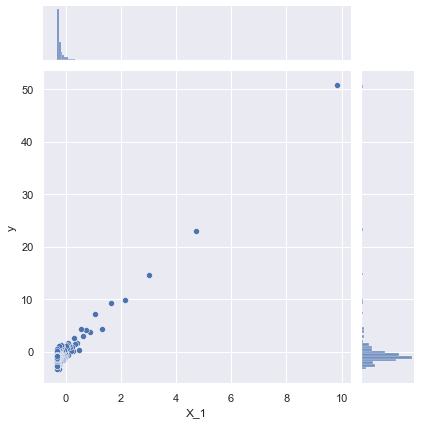

In [12]:
# 종속변수와 독립변수 합치기
large_data = pd.concat([pd.DataFrame({"y" : y}), X], axis = 1)

# 그래프 그리기
sns.jointplot(y = "y", x = "X_1", data = large_data)

* 종속변수로 사용된 데이터는 가상의 데이터임(저자 임의 생산)

### 7.3.5 일반적인 최소제곱법 적용하기

* 일반적인 최소제곱법을 이용해서 파라미터 추정

In [13]:
lm_statsmodels = sm.OLS(endog = y, exog = X).fit()
lm_statsmodels.params.round(3)

X_1       14.755
X_2      -87.463
X_3      211.743
X_4      -94.153
X_5      -68.175
          ...   
X_96      -2.479
X_97     -13.059
X_98      -5.545
X_99      -2.923
X_100      2.945
Length: 100, dtype: float64

### 7.3.6 sklearn을 이용한 선형회귀

* 사이킷런에서 실시하는 일반적인 최소제곱법을 이용한 정규선형모델

* 사이킷런에서는 먼저 모델의 구조를 지정한 후 fit 함수의 파라미터로 데이터를 지정

* 추정된 계수는 coef_ 변수에 저장됨(계수의 절댓값이 크게 추정되는 것에 주목)

In [14]:
# 어떤 모델을 만들지 지정
lm_sklearn = linear_model.LinearRegression()

# 데이터를 지정하여 모델을 추정
lm_sklearn.fit(X, y)

# 추정된 파라미터(array형)
lm_sklearn.coef_.round(3)

array([ 1.476e+01, -8.746e+01,  2.117e+02, -9.415e+01, -6.817e+01,
       -9.284e+01,  1.761e+00,  8.169e+01,  6.680e+01,  2.788e+01,
       -3.288e+01,  6.818e+01, -1.699e+01,  2.209e+01, -4.855e+01,
       -3.390e+01, -4.536e+01,  9.728e+00,  2.481e+01,  1.858e+00,
        1.599e+00, -2.838e+01,  6.477e+00, -5.980e+01,  3.532e+01,
       -1.302e+01,  4.108e+01, -4.303e+01,  5.247e+01,  1.920e+00,
        3.342e+01,  8.490e+00,  8.329e+00, -2.293e+01, -3.577e+01,
       -1.337e+01,  3.178e+01, -2.018e+01, -2.654e+01, -3.523e+01,
        1.927e+01,  4.823e+01, -1.655e+00,  5.750e-01, -1.893e+01,
        7.370e-01,  1.047e+01, -7.732e+00, -1.854e+00, -2.560e-01,
       -5.045e+00, -4.227e+00,  2.523e+01,  1.616e+01, -1.310e+01,
        6.455e+00, -1.332e+01, -2.291e+01, -1.202e+01,  7.745e+00,
        1.755e+01,  5.997e+00,  4.648e+00,  4.120e+00, -1.825e+00,
        5.366e+00,  4.546e+00, -2.598e+00, -4.091e+00,  7.496e+00,
        3.100e+01,  1.530e+01, -5.323e+00, -1.509e+01, -3.801e

### 7.3.7 릿지 회귀 - 벌칙항의 영향

* 일반적인 최소제곱법으로는 잘 되지 않는 것을 알 수 있었으므로 정규화를 사용함

* 우선 리지 회귀를 이용

    - 정규화에 있어서 중요한 것은 정규화의 강도 $\alpha$의 결정
    
    - 정규화의 강도 $\alpha$가 주는 영향부터 알아보도록 함

In [15]:
# alpha 값 50개 생성
n_alphas = 50
ridge_alphas = np.logspace(-2, 0.7, n_alphas)
ridge_alphas

array([0.01 , 0.011, 0.013, 0.015, 0.017, 0.019, 0.021, 0.024, 0.028,
       0.031, 0.036, 0.04 , 0.046, 0.052, 0.059, 0.067, 0.076, 0.086,
       0.098, 0.111, 0.126, 0.144, 0.163, 0.185, 0.21 , 0.239, 0.271,
       0.307, 0.349, 0.396, 0.45 , 0.511, 0.58 , 0.658, 0.747, 0.848,
       0.963, 1.093, 1.241, 1.409, 1.6  , 1.816, 2.062, 2.341, 2.658,
       3.017, 3.425, 3.889, 4.415, 5.012])

* np.logspace는 이번에 처음 등장한 함수

     - np.arange와 비슷한 함수로 밑이 10인 로그를 취한 등차수열

In [16]:
np.log10(ridge_alphas) # -2 ~ 0.7 까지 등차 수열이 됨을 알 수 있음

array([-2.   , -1.945, -1.89 , -1.835, -1.78 , -1.724, -1.669, -1.614,
       -1.559, -1.504, -1.449, -1.394, -1.339, -1.284, -1.229, -1.173,
       -1.118, -1.063, -1.008, -0.953, -0.898, -0.843, -0.788, -0.733,
       -0.678, -0.622, -0.567, -0.512, -0.457, -0.402, -0.347, -0.292,
       -0.237, -0.182, -0.127, -0.071, -0.016,  0.039,  0.094,  0.149,
        0.204,  0.259,  0.314,  0.369,  0.424,  0.48 ,  0.535,  0.59 ,
        0.645,  0.7  ])

* 50개의 𝛼를 바꿔가면서 50번 리지 회귀로 추정함

* 리지 회귀 추정에는 linear_model.Ridge 함수를 사용

    - $\alpha$와 절편은 추정하지 않는 파라미터 옵션 지정
    
    > **(옵션 참고)** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [17]:
# 추정한 회귀계수를 저장할 리스트
ridge_coefs = []

# for 루프로 리지 회귀를 추정함
for a in ridge_alphas:
    ridge = linear_model.Ridge(alpha = a, fit_intercept = False)
    ridge.fit(X, y)
    ridge_coefs.append(ridge.coef_)

In [18]:
# 추정된 계수를 numpy 배열로 변환
ridge_coefs = np.array(ridge_coefs)
ridge_coefs.shape

(50, 100)

* 계수 추정 결과를 확인하기 위해 그래프를 그림 

* 결과를 보기 쉽게 하기 위해 가로축을 $-log_{10}{\alpha}$로 변환한 뒤 그래프를 그림

* 이런 그래프를 **solution-path**라고 함

Text(0, 0.5, 'Coefficients')

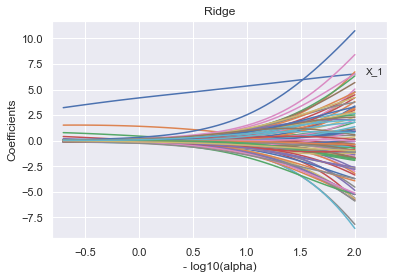

In [19]:
# alpha 변환
log_alphas = -np.log10(ridge_alphas)

# 가로축을 -log10(𝛼)로 , 세로축을 계수로 하는 그래프 그리기 
plt.plot(log_alphas, ridge_coefs);

# 독립변수 X_1의 계수를 알기 쉽게 표시
plt.text( max(log_alphas) + 0.1 , np.array(ridge_coefs)[0, 0],"X_1")

# x축의 범위
plt.xlim([min(log_alphas) - 0.1, max(log_alphas)+ 0.3])

# x축 레이블
plt.title("Ridge")
plt.xlabel("- log10(alpha)")
plt.ylabel("Coefficients")

* 가로축이 $-log_{10}{\alpha}$ 이므로 왼쪽으로 갈수록  $\alpha$가 크고, 정규화의 강도가 강하다는 데 주의!

    * 왼쪽으로 갈수록 계수의 절대치가 작게 추정
    
    * 오른쪽으로 갈수록 벌칙이 완화되어 계수의 절대치가 크게 추정됨

### 7.3.8 리지 회귀 - 최적의 정규화 강도 결정

* $\alpha$의 크기 결정

    - 교차검증법을 이용하여 예측 정확도를 평가해서 정확도가 가장 좋은 $\alpha$를 채택하여 모델을 재구축함
    
    - RidgeCV 함수 이용(인수로 cv = 10 을 넣으면 10-fold-CV를 사용해서 예측 정확도를 평가함)

In [20]:
# CV에서 최적의 𝛼를 구함
ridge_best = linear_model.RidgeCV(cv = 10, alphas = ridge_alphas, fit_intercept = False)
ridge_best.fit(X, y)

RidgeCV(alphas=array([0.01 , 0.011, 0.013, 0.015, 0.017, 0.019, 0.021, 0.024, 0.028,
       0.031, 0.036, 0.04 , 0.046, 0.052, 0.059, 0.067, 0.076, 0.086,
       0.098, 0.111, 0.126, 0.144, 0.163, 0.185, 0.21 , 0.239, 0.271,
       0.307, 0.349, 0.396, 0.45 , 0.511, 0.58 , 0.658, 0.747, 0.848,
       0.963, 1.093, 1.241, 1.409, 1.6  , 1.816, 2.062, 2.341, 2.658,
       3.017, 3.425, 3.889, 4.415, 5.012]),
        cv=10, fit_intercept=False)

In [21]:
# 최적의 -log10(alpha)
-np.log10(ridge_best.alpha_)

0.237

*  $-log_{10}{\alpha} = 0.237$ 지점을 좀 전의 solution-path에서 보면 X_1 이외의 독립변수의 계수의 절댓값이 0에 가까운 것으로 나타남

In [22]:
# best alpha 값

ridge_best.alpha_

0.580

In [23]:
# 이때 추정된 계수 확인

ridge_best.coef_

array([ 4.463,  1.288,  0.293, -0.091, -0.201, -0.233, -0.215, -0.206,
       -0.145, -0.135, -0.155, -0.046, -0.097, -0.017, -0.11 , -0.012,
       -0.094,  0.013, -0.018, -0.031,  0.025, -0.029,  0.043, -0.087,
        0.127,  0.021,  0.055, -0.077,  0.141, -0.007,  0.099,  0.116,
       -0.044,  0.037, -0.034,  0.015,  0.123, -0.171, -0.007, -0.182,
        0.09 ,  0.222,  0.035, -0.032, -0.008,  0.025,  0.338, -0.193,
       -0.108,  0.212, -0.128, -0.246,  0.249,  0.128, -0.155,  0.27 ,
        0.03 , -0.165, -0.178,  0.158, -0.011,  0.013,  0.194,  0.134,
       -0.156, -0.018,  0.256,  0.223, -0.185,  0.006,  0.535,  0.181,
       -0.348, -0.123,  0.226, -0.043, -0.115, -0.053,  0.209,  0.189,
       -0.042, -0.205, -0.099,  0.059, -0.224,  0.15 , -0.039, -0.113,
        0.21 ,  0.012,  0.129, -0.032, -0.022, -0.229, -0.198,  0.245,
       -0.305, -0.396, -0.163,  0.164])

* 독립변수 X_1의 계수가 4.463이 된 것을 보면 정답과 상당히 가까운 값이 된 것을 나타남

* 여기서 다른 독립변수의 계수를 보면 나름대로 작은 값으로 되어 있지만 영향이 아예 없다고는 할 수 없음

### 7.3.9 라소 회귀 - 벌칙항의 영향

* lasso_path라는 편리한 함수를 이용하여 실시

* 파라미터로 데이터를 지정하는 것만으로도 $\alpha$를 다양하게 변화시킨 결과를 출력함

In [24]:
lasso_alphas, lasso_coefs, _ = linear_model.lasso_path(X, y)

In [25]:
lasso_coefs

array([[ 0.   ,  0.339,  0.656, ...,  5.293,  5.303,  5.313],
       [ 0.   ,  0.   ,  0.   , ..., -0.   , -0.   , -0.   ],
       [ 0.   ,  0.   ,  0.   , ..., -0.   , -0.   , -0.   ],
       ...,
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ]])

In [26]:
lasso_coefs[0]

array([0.   , 0.339, 0.656, 0.951, 1.226, 1.482, 1.722, 1.945, 2.153,
       2.347, 2.528, 2.697, 2.855, 3.001, 3.138, 3.266, 3.385, 3.496,
       3.6  , 3.696, 3.787, 3.871, 3.949, 4.022, 4.09 , 4.154, 4.213,
       4.268, 4.32 , 4.368, 4.413, 4.455, 4.494, 4.53 , 4.564, 4.596,
       4.625, 4.653, 4.678, 4.702, 4.725, 4.745, 4.765, 4.783, 4.8  ,
       4.816, 4.83 , 4.844, 4.857, 4.869, 4.88 , 4.89 , 4.9  , 4.909,
       4.917, 4.925, 4.932, 4.939, 4.945, 4.951, 4.957, 4.962, 4.967,
       4.971, 4.98 , 4.99 , 4.999, 5.008, 5.018, 5.027, 5.035, 5.044,
       5.057, 5.066, 5.073, 5.08 , 5.093, 5.101, 5.108, 5.114, 5.121,
       5.136, 5.143, 5.149, 5.167, 5.173, 5.179, 5.184, 5.19 , 5.212,
       5.224, 5.231, 5.234, 5.239, 5.264, 5.28 , 5.285, 5.293, 5.303,
       5.313])

In [27]:
len(lasso_coefs[0])

100

In [28]:
len(lasso_alphas)

100

Text(0, 0.5, 'Coefficients')

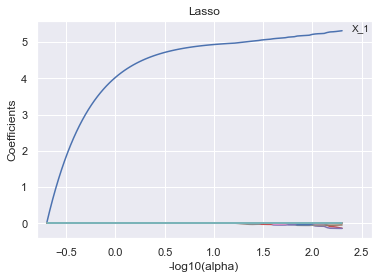

In [29]:
# alpha 변환
log_alphas= -np.log10(lasso_alphas)

# 가로축을 -log10(alpha), 세로축을 계수로 하는 그래프
plt.plot(log_alphas, lasso_coefs.T);

# 독립변수 X_1의 계수를 알기 쉽게 표시
plt.text(max(log_alphas) + 0.1, lasso_coefs[0, -1], "X_1")

# x축의 범위
plt.xlim([min(log_alphas) - 0.1, max(log_alphas) + 0.3])

# 축 레이블
plt.title("Lasso")
plt.xlabel("-log10(alpha)")
plt.ylabel("Coefficients")

### 7.3.10 라소 회귀 - 최적의 정규화 강도 결정

* 교차 검증법을 이용해서 $\alpha$를 결정함

In [30]:
# CV로 최적의 𝛼를 구함
lasso_best = linear_model.LassoCV(cv = 10, alphas = lasso_alphas)
lasso_best.fit(X, y)

LassoCV(alphas=array([5.   , 4.663, 4.349, 4.056, 3.782, 3.527, 3.29 , 3.068, 2.861,
       2.668, 2.488, 2.321, 2.164, 2.018, 1.882, 1.756, 1.637, 1.527,
       1.424, 1.328, 1.239, 1.155, 1.077, 1.005, 0.937, 0.874, 0.815,
       0.76 , 0.709, 0.661, 0.616, 0.575, 0.536, 0.5  , 0.466, 0.435,
       0.406, 0.378, 0.353, 0.329, 0.307, 0.286, 0.267, 0.249, 0.232,
       0.216, 0.202, 0.188, 0.176, 0.164, 0.153, 0.142, 0.133, 0.124,
       0.116, 0.108, 0.1  , 0.094, 0.087, 0.081, 0.076, 0.071, 0.066,
       0.062, 0.057, 0.054, 0.05 , 0.047, 0.043, 0.041, 0.038, 0.035,
       0.033, 0.031, 0.029, 0.027, 0.025, 0.023, 0.022, 0.02 , 0.019,
       0.018, 0.016, 0.015, 0.014, 0.013, 0.012, 0.012, 0.011, 0.01 ,
       0.009, 0.009, 0.008, 0.008, 0.007, 0.007, 0.006, 0.006, 0.005,
       0.005]),
        cv=10)

In [31]:
# 최적의 -log10(alpha)
-np.log10(lasso_best.alpha_)

2.301

In [32]:
# 최적의 alpha 값
lasso_best.alpha_

0.005

In [33]:
# 추정된 계수 목록

lasso_best.coef_

array([ 5.336e+00, -0.000e+00, -0.000e+00, -3.043e-01, -4.121e-02,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00,  0.000e+00, -0.000e+00,
        0.000e+00,  0.000e+00, -0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00, -0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        8.425e-03,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e

* X_1의 계수가 5, 나머지 대부분의 계수가 0이 되는 것을 확인할 수 있음